# Projet Little Sister V2.
### La société "Little Sister" est une entreprise spécialisée dans le secteur de la vidéosurveillance. Elle revient vers vous afin d'améliorer l'algorithme que vous lui avez précédemment fourni.

### La performance de ce modèle ne répond aujourd'hui pas aux espérances de la société. Il faut donc tout d'abord **analyser la performance d'un modèle sans préprocessing** et essayer d'améliorer la qualité du modèle avec du préprocessing (ici data augmentation).

## Imports et paramètrage

In [1]:
%load_ext tensorboard

from keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use("fivethirtyeight")

from classes.functions import functions

In [2]:
# Chemins du projet
MODELS_ROOT = "models/"

# Initialisation
fc = functions()

# Autres paramètres
epochs = 15
img_size = 32
batch_size = 64

## Import et traitement des images d'entraînement/test avant leur utilisation

In [3]:
# Import et split
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

label:  [6]


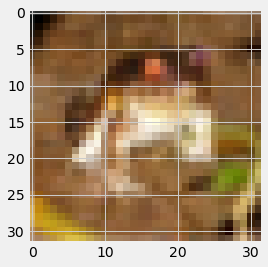

In [4]:
# Affichage de la première image du jeu d'entraînement
plt.imshow(X_train[0])
print("label: ", y_train[0])

In [5]:
# Verrification de la taille des images
# (spoiler: la taille est bonne, pas besoin de les resize étant donné que je veux travailler sur des images 32x32)
X_train[0].shape

(32, 32, 3)

In [6]:
# Catégorisation (A chaque image, attribue un binaire pour chaque label - 1 quand c'est le bon label)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Exemple sur la première image
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Création d'un modèle basique

### Création :

In [7]:
# Création d'un modèle séquentiel qui se résume à une pile linéaire de couches
model = fc.create_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81930     
Total params: 157,578
Trainable params: 157,578
Non-trainable params: 0
_________________________________________________________________


### Entraînement :

In [8]:
logdir = os.path.join("logs", "cnn_base")
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
    
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

datagen_first = ImageDataGenerator()
iterator = datagen_first.flow(X_train, y_train, batch_size=batch_size)
history = model.fit_generator(iterator, epochs=epochs, validation_data=(X_val, y_val), verbose=1, callbacks=[tensorboard_callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
  1/782 [..............................] - ETA: 0s - loss: 41.9532 - accuracy: 0.0781WARNING:tensorflow:From C:\Users\utilisateur\anaconda3\envs\CNN\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
782/782 [==============================] - 151s 193ms/step - loss: 2.6568 - accuracy: 0.3974 - val_loss: 1.4854 - val_accuracy: 0.4680
Epoch 2/15
782/782 [==============================] - 154s 197ms/step - loss: 1.3923 - accuracy: 0.5117 - val_loss: 1.3050 - val_accuracy: 0.5382
Epoch 3/15
782/782 [==============================] - 143s 183ms/step - loss: 1.2459 - accuracy: 0.5637 - val_loss: 1.2158 - val_accuracy: 0.5757
Epoch 4/15
782/782 [==============================] - 145s 185ms/step - loss: 1.1649 - accuracy: 0.5952 

In [9]:
# Sauvegarde du modèle
model.save(MODELS_ROOT + "model1.h5")
print("Modèle enregistré !")

Modèle enregistré !


## Ajout de data augmentation

### Entraînement avec data augmentation :

In [10]:
# Création du modèle
model_da = fc.create_model()

logdir = os.path.join("logs", "cnn_data_augmentation")
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
    
model_da.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Data augmentation
datagen_da = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
iterator = datagen_da.flow(X_train, y_train, batch_size=batch_size)
history_da = model_da.fit_generator(iterator, epochs=epochs, validation_data=(X_val, y_val), verbose=1, callbacks=[tensorboard_callback])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                81930     
Total params: 157,578
Trainable params: 157,578
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
782/782 [==============================] - 147s 188ms/step - loss: 2.4168 - accuracy: 0.4181 - val_loss

In [11]:
# Sauvegarde du modèle
model_da.save(MODELS_ROOT + "model2.h5")
print("Modèle enregistré !")

Modèle enregistré !


## Comparaison modèles avec et sans data augmentation

In [12]:
# Sans data augmentation
score = model.evaluate(X_val, y_val, verbose=0)
print("Test de pertes:", score[0], "\nTest de précision:", score[1])

# Avec data augmentation
score = model_da.evaluate(X_val, y_val, verbose=0)
print("Test de pertes avec data augmentation :", score[0], "\nTest de précision avec data augmentation :", score[1])

Test de pertes: 1.6409786939620972 
Test de précision: 0.6050000190734863
Test de pertes avec data augmentation : 1.0928555727005005 
Test de précision avec data augmentation : 0.6284999847412109


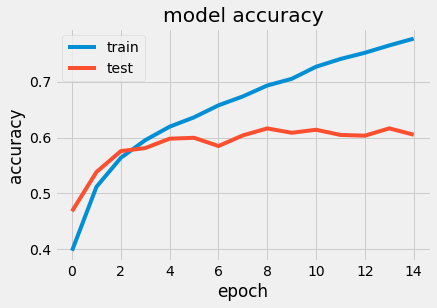

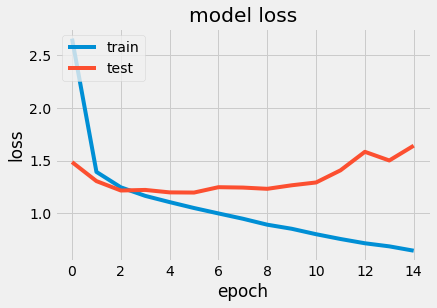

In [13]:
# Modèle sans data augmentation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

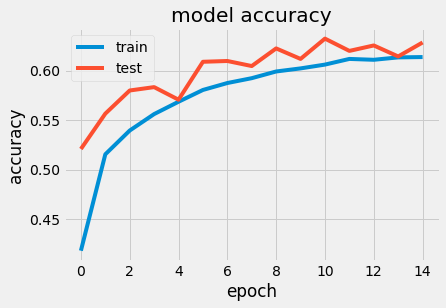

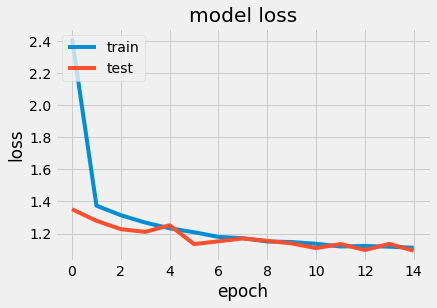

In [14]:
# Modèle data augmentation
plt.plot(history_da.history['accuracy'])
plt.plot(history_da.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_da.history['loss'])
plt.plot(history_da.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Tests de prédiction

In [17]:
# Test de prédiction sur les 4 premières images du jeu de test
model.predict(X_val[:4])

array([[9.07884166e-02, 4.37217750e-06, 2.90010106e-02, 6.37497962e-01,
        1.03511651e-04, 3.40591324e-03, 5.72682405e-03, 3.02247986e-06,
        2.33455077e-01, 1.39330605e-05],
       [9.99987841e-01, 8.47532419e-07, 6.55363838e-13, 9.70538093e-17,
        7.22187660e-15, 1.11105146e-17, 3.45104558e-15, 7.61860607e-22,
        1.13354890e-05, 9.73736825e-09],
       [2.17754282e-02, 6.08043862e-04, 4.69557490e-05, 6.52824019e-06,
        7.98046312e-06, 2.16527928e-06, 7.04312015e-07, 6.56193038e-07,
        9.77543175e-01, 8.35815990e-06],
       [5.11801183e-01, 4.97806892e-02, 4.58105356e-02, 1.02111755e-03,
        3.35686578e-04, 3.72147952e-07, 3.13559103e-05, 1.58324736e-04,
        3.79845023e-01, 1.12157371e-02]], dtype=float32)

In [18]:
# Test de prédiction sur les 4 premières images du jeu de test avec data augmentation
model_da.predict(X_val[:4])

array([[9.92186600e-04, 8.43276095e-04, 3.47396429e-03, 3.17449927e-01,
        2.39703315e-03, 4.06766236e-01, 2.58512914e-01, 5.08268946e-04,
        8.53202865e-03, 5.24188625e-04],
       [7.52764894e-03, 6.34543657e-01, 3.55538532e-07, 3.51333398e-07,
        3.40490054e-08, 8.15572321e-09, 6.46949616e-07, 3.77741117e-07,
        3.50366652e-01, 7.56018236e-03],
       [1.58150002e-01, 1.12565577e-01, 9.26537998e-03, 7.44401244e-03,
        7.88617413e-03, 7.32596871e-03, 4.90272045e-03, 6.96937041e-03,
        5.40849626e-01, 1.44641101e-01],
       [3.28625858e-01, 7.54498988e-02, 5.62583003e-03, 2.86901440e-03,
        1.30513756e-04, 1.43947018e-05, 5.11788181e-04, 1.00121535e-04,
        5.82787037e-01, 3.88559303e-03]], dtype=float32)

In [19]:
# Valeurs réelles
y_val[:4]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
%tensorboard --logdir logs --host=localhost --port=8005

Reusing TensorBoard on port 8005 (pid 5992), started 19:36:04 ago. (Use '!kill 5992' to kill it.)

# Conclusion
On remarque qu'un même modèle est bien plus performant après la data augmentation, les courbes représentatives des trains et tests au cours des epochs sont bien plus proches ce qui veut dire que les résultats acquis sur le jeu de tests du modèle ont plus de justesse, on retire l'overfitting, le modèle a davantage d'images sur lesquelles s'entraîner.